In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.shape

(404290, 6)

In [7]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [8]:
# Step 2: Defining the Problem Statement
# --------------------------------------
# The goal of this project is to determine whether two questions asked on Quora are duplicates.
# Duplicate questions are those that have the same intent and should be answered only once.
# By identifying duplicate questions, we can improve user experience by reducing redundant content.

problem_statement = "Identify whether two given questions on Quora have the same meaning (are duplicates) or not."
print("\nProblem Statement:", problem_statement)


Problem Statement: Identify whether two given questions on Quora have the same meaning (are duplicates) or not.


In [9]:
#Step 3: Identifying the Target Variable
# The target variable in our dataset is 'is_duplicate', which indicates whether two questions are duplicates (1) or not (0).
# This is a binary classification problem.

target_variable = 'is_duplicate'
print("\nTarget Variable:", target_variable)



Target Variable: is_duplicate


In [10]:
print("\nUnique Values in Target Column:")
print(df[target_variable].value_counts())


Unique Values in Target Column:
is_duplicate
0    255027
1    149263
Name: count, dtype: int64


In [11]:
duplicate_percentage = df[target_variable].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Target Variable:")
print(duplicate_percentage)


Percentage Distribution of Target Variable:
is_duplicate
0    63.080215
1    36.919785
Name: proportion, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_28032\4043560486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target_variable], palette='coolwarm')


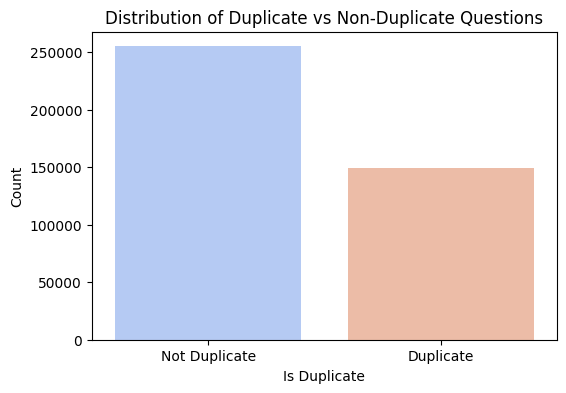

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x=df[target_variable], palette='coolwarm')
plt.title("Distribution of Duplicate vs Non-Duplicate Questions")
plt.xlabel("Is Duplicate")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Duplicate", "Duplicate"])
plt.show()

In [13]:
if duplicate_percentage.min() < 30:
    print("\nWarning: The dataset has a class imbalance, which may affect model performance.")
else:
    print("\nThe dataset has a balanced class distribution.")


The dataset has a balanced class distribution.


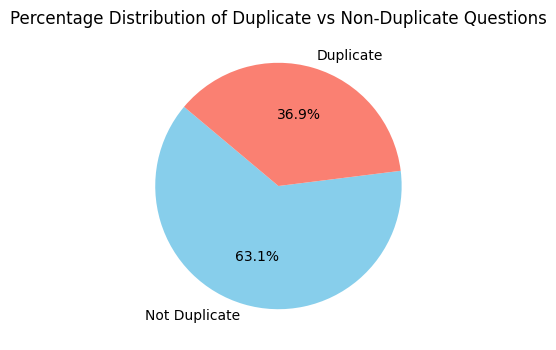

In [14]:
plt.figure(figsize=(6, 4))
labels = ["Not Duplicate", "Duplicate"]
plt.pie(duplicate_percentage, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title("Percentage Distribution of Duplicate vs Non-Duplicate Questions")
plt.show()

In [15]:
#Step 5: Basic Data Exploration – EDA

# Checking for null values in question1 and question2
print("\nMissing Values in Questions:")
print(df[['question1', 'question2']].isnull().sum())


Missing Values in Questions:
question1    1
question2    2
dtype: int64


In [16]:
# Filling missing values with an empty string
df['question1'].fillna("", inplace=True)
df['question2'].fillna("", inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_28032\3157819770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['question1'].fillna("", inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_28032\3157819770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [17]:
# Adding new features: Length of each question
df['q1_length'] = df['question1'].apply(lambda x: len(str(x)))
df['q2_length'] = df['question2'].apply(lambda x: len(str(x)))
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39
...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85,79
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,41,42
404287,404287,537928,537929,What is one coin?,What's this coin?,0,17,17
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,94,127


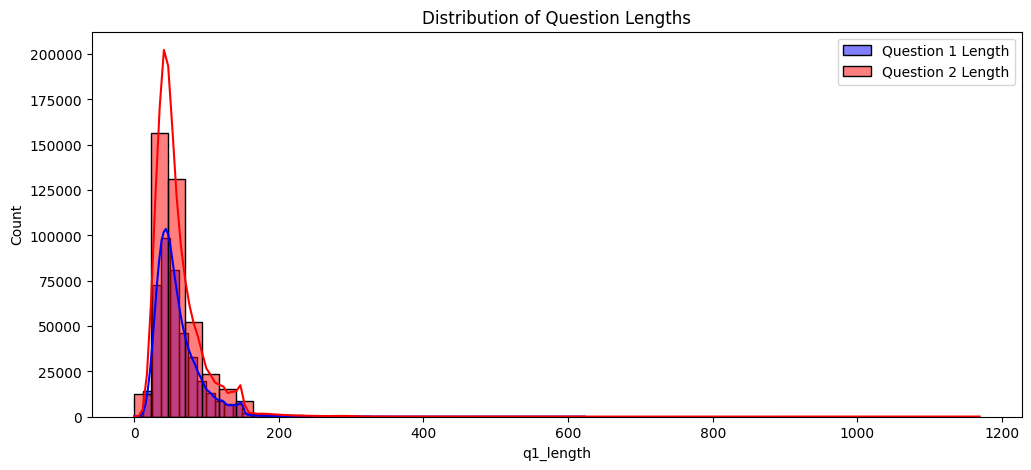

In [18]:
# Plotting the distribution of question lengths
plt.figure(figsize=(12,5))
sns.histplot(df['q1_length'], bins=50, color='blue', label='Question 1 Length', kde=True)
sns.histplot(df['q2_length'], bins=50, color='red', label='Question 2 Length', kde=True)
plt.legend()
plt.title("Distribution of Question Lengths")
plt.show()

In [19]:
# Checking the average length of questions
print("\nAverage Length of Question 1:", df['q1_length'].mean())
print("Average Length of Question 2:", df['q2_length'].mean())


Average Length of Question 1: 59.53670879813995
Average Length of Question 2: 60.10836528234683


In [20]:
# Checking if questions are identical
df['same_question'] = (df['question1'] == df['question2']).astype(int)
print("\nNumber of Identical Questions:")
print(df['same_question'].value_counts())


Number of Identical Questions:
same_question
0    404290
Name: count, dtype: int64


In [21]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    return text

df['question1_clean'] = df['question1'].apply(clean_text)
df['question2_clean'] = df['question2'].apply(clean_text)

df['q1_word_count'] = df['question1_clean'].apply(lambda x: len(x.split()))
df['q2_word_count'] = df['question2_clean'].apply(lambda x: len(x.split()))
df['common_word_count'] = df.apply(lambda x: len(set(x['question1_clean'].split()) & set(x['question2_clean'].split())), axis=1)

print("Feature Engineering Completed")
df.head()

Feature Engineering Completed


,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,same_question,question1_clean,question2_clean,q1_word_count,q2_word_count,common_word_count
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,14,12,11
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,0,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,0,why am i mentally very lonely how can i solve it,find the remainder when mathmath is divided by,11,8,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7,4


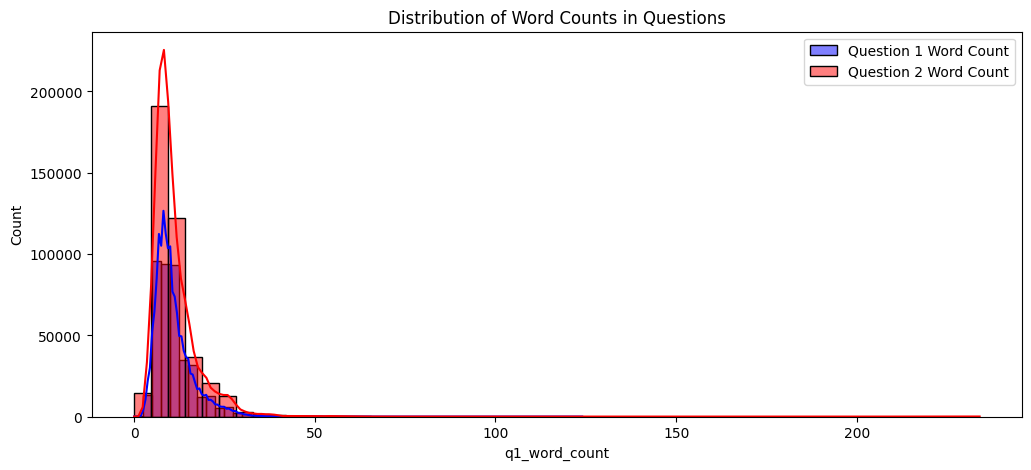

In [22]:
plt.figure(figsize=(12, 5))
sns.histplot(df['q1_word_count'], bins=50, color='blue', label='Question 1 Word Count', kde=True)
sns.histplot(df['q2_word_count'], bins=50, color='red', label='Question 2 Word Count', kde=True)
plt.legend()
plt.title("Distribution of Word Counts in Questions")
plt.show()

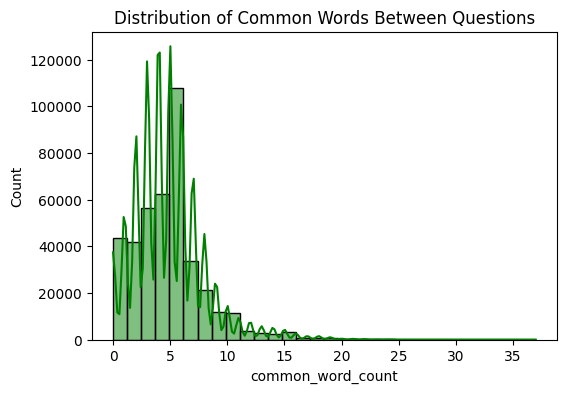

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(df['common_word_count'], bins=30, color='green', kde=True)
plt.title("Distribution of Common Words Between Questions")
plt.show()

In [24]:
#Step 8: Rejecting Useless Columns
columns_to_drop = ['id', 'qid1', 'qid2']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print("Dropped Columns:", columns_to_drop)
df.head(5)

Dropped Columns: ['id', 'qid1', 'qid2']


,question1,question2,is_duplicate,q1_length,q2_length,same_question,question1_clean,question2_clean,q1_word_count,q2_word_count,common_word_count
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,14,12,11
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,0,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,8,13,4
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10,4
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,0,why am i mentally very lonely how can i solve it,find the remainder when mathmath is divided by,11,8,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7,4


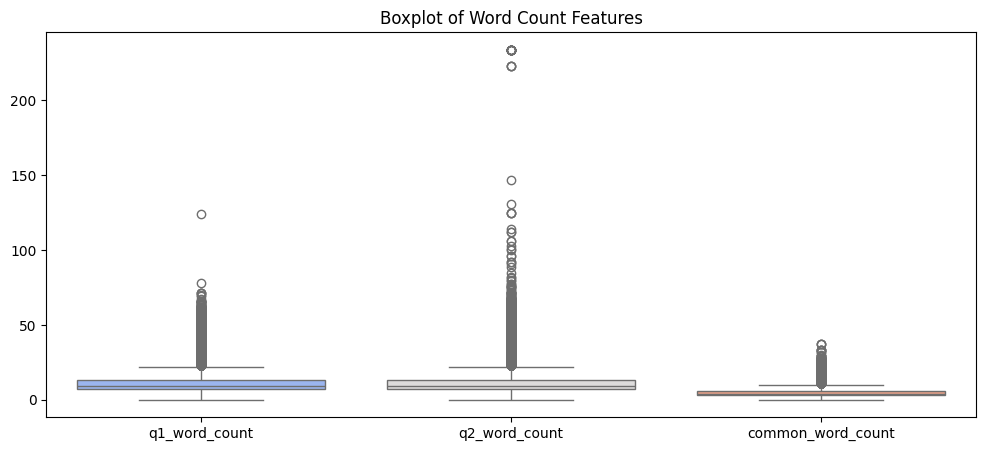

In [25]:
# Step 9: Feature Selection Based on Data Distribution
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['q1_word_count', 'q2_word_count', 'common_word_count']], palette='coolwarm')
plt.title("Boxplot of Word Count Features")
plt.show()

In [26]:
# Selecting relevant features for modeling
selected_features = ['q1_word_count', 'q2_word_count', 'common_word_count']
print("Selected Features for Model Training:", selected_features)

Selected Features for Model Training: ['q1_word_count', 'q2_word_count', 'common_word_count']


In [27]:
# Identifying outliers using IQR method
Q1 = df[selected_features].quantile(0.25)
Q3 = df[selected_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [28]:
# Filtering out outliers
df = df[~((df[selected_features] < lower_bound) | (df[selected_features] > upper_bound)).any(axis=1)]

print("Outlier Treatment Completed. Updated dataset shape:", df.shape)

Outlier Treatment Completed. Updated dataset shape: (354984, 11)


In [29]:
#Step 11: Missing Values Treatment
print("Missing Values after Processing:")
print(df.isnull().sum())

df.fillna("", inplace=True)
print("Missing Values Treated")


Missing Values after Processing:
question1            0
question2            0
is_duplicate         0
q1_length            0
q2_length            0
same_question        0
question1_clean      0
question2_clean      0
q1_word_count        0
q2_word_count        0
common_word_count    0
dtype: int64
Missing Values Treated


C:\Users\HP\AppData\Local\Temp\ipykernel_28032\1777797869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("", inplace=True)


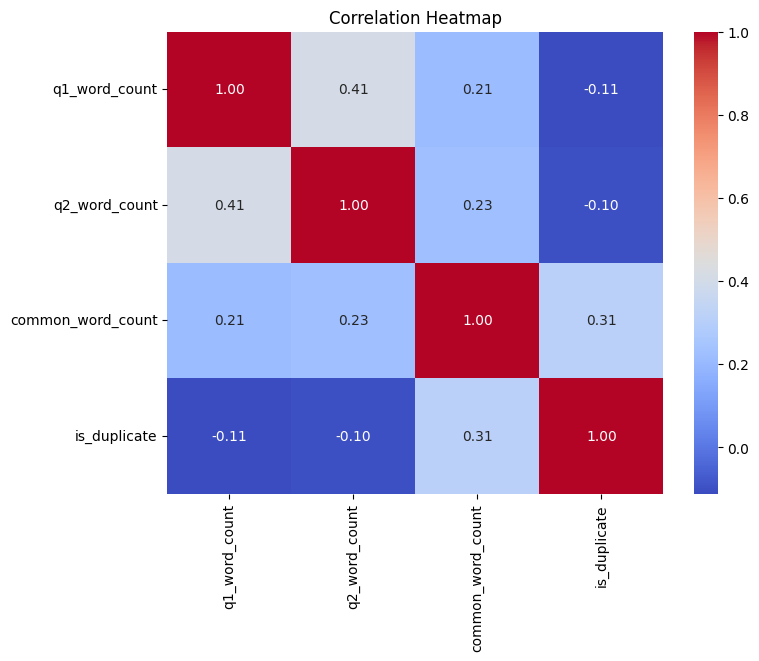

Visual Correlation Analysis Completed


In [30]:
# Step 12: Visual Correlation Analysis
plt.figure(figsize=(8,6))
sns.heatmap(df[['q1_word_count', 'q2_word_count', 'common_word_count', 'is_duplicate']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

print("Visual Correlation Analysis Completed")

In [31]:
print("\nStatistical Correlation Analysis:")
print(df[['q1_word_count', 'q2_word_count', 'common_word_count', 'is_duplicate']].corr())


Statistical Correlation Analysis:
                   q1_word_count  q2_word_count  common_word_count  \
q1_word_count           1.000000       0.405582           0.210292   
q2_word_count           0.405582       1.000000           0.226527   
common_word_count       0.210292       0.226527           1.000000   
is_duplicate           -0.111275      -0.100644           0.312657   

                   is_duplicate  
q1_word_count         -0.111275  
q2_word_count         -0.100644  
common_word_count      0.312657  
is_duplicate           1.000000  


In [32]:
#Step 14: Converting Data to Numeric for ML
X = df[['q1_word_count', 'q2_word_count', 'common_word_count']]
y = df['is_duplicate']

In [33]:
# Step 15: Sampling and K-Fold Cross Validation
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
df.head()

,question1,question2,is_duplicate,q1_length,q2_length,same_question,question1_clean,question2_clean,q1_word_count,q2_word_count,common_word_count
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,0,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,8,13,4
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,14,10,4
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,0,why am i mentally very lonely how can i solve it,find the remainder when mathmath is divided by,11,8,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,13,7,4
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,86,90,0,astrology i am a capricorn sun cap moon and ca...,im a triple capricorn sun moon and ascendant i...,16,16,9


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Logistic Regression - Mean Accuracy: {np.mean(lr_scores):.4f}")


Logistic Regression - Mean Accuracy: 0.6516


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Random Forest - Mean Accuracy: {np.mean(rf_scores):.4f}")

Random Forest - Mean Accuracy: 0.6682


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Gradient Boosting - Mean Accuracy: {np.mean(gb_scores):.4f}")

Gradient Boosting - Mean Accuracy: 0.6649


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [40]:
print(f"Test Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Test Accuracy: 0.6693

Confusion Matrix:
 [[29559 13252]
 [10224 17962]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72     42811
           1       0.58      0.64      0.60     28186

    accuracy                           0.67     70997
   macro avg       0.66      0.66      0.66     70997
weighted avg       0.68      0.67      0.67     70997



In [42]:
import joblib
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [43]:
model = joblib.load('model.pkl')